In [80]:
import pandas as pd
import json

In [2]:
import dhlab.nbtext as nb
import dhlab.module_update as mu

In [3]:
def matrix_cosine(merge_coll, top=200):
    from scipy.spatial.distance import cosine

    stack = []
    res = dict()
    for i in merge_coll:
        res[i] = dict()
        for j in merge_coll:
            res[i][j] = 1 - cosine(merge_coll[i][:top].fillna(0), merge_coll[j][:top].fillna(0))  

    return res

Henter ut referansematerialet

In [4]:
tot = nb.frame(nb.totals(50000), 'tot')

Finner et korpus over Harry Potter

In [5]:
harry = nb.book_urn(author="%rowling%", title="%potter%", limit=100)

Sjekker at URNene er unike

In [6]:
harry = nb.unique_urns(harry)

In [7]:
nb.frame(nb.metadata(nb.pure_urn(harry)))

,0,1,2,3,4,5,6,7,8,9
0,2012111406120,"Rowling, J.K.",2011,Harry Potter og Føniksordenen,,Cappelen Damm,novel,63a1be63c5824b6b0e9121f609c75c3f,nob,eng
1,2012112638152,"Rowling, J.K.",2011,Harry Potter og dødstalismanene,,Cappelen Damm,novel,4f2d092d5e8188ff421d7b806e9fa22f,nob,eng
2,2014022806023,"Rowling, J.K.",2011,Harry Potter og de vises stein,,Cappelen Damm,novel,24bd005bcf6807078a3a47a3be9317a2,nob,eng
3,2014073005084,"Rowling, J.K.",2011,Harry Potter og ildbegeret,,Cappelen Damm,novel,1c3360806d1422c7aad420a3d6dbc35e,nob,eng
4,2014030406051,"Rowling, J.K.",2011,Harry Potter og mysteriekammeret,,Cappelen Damm,novel,b824979b383aab196ce6bb820d0edfc5,nob,eng
5,2014022605057,"Rowling, J.K.",2011,Harry Potter og halvblodsprinsen,,Cappelen Damm,novel,5274465ec80af9381bdbf35fc9b5c24f,nob,eng
6,2013061108157,"Rowling, J.K.",2001,Harry Potter 1-4,,"Damm;[Oslo] : Damm, 2001",fiction,b4ffd22ba54167a8e92d30e00a1b35df,nob,
7,2013072208063,"Rowling, J.K.",2011,Harry Potter og fangen fra Azkaban,,Cappelen Damm,novel,3de05e64425e462084ed2f09c41a0770,nob,eng
8,2013012338004,"Rowling, J.K.",2011,Harry Potter,hele serien samlet,"Cappelen Damm;[Oslo] : Cappelen Damm, 2011",novel,09a78ed5c2dc866da70913a652b3d417,nob,eng


Ser ut som alt ligger i siste bok, som inneholder hele serien. Men bør sjekke om alt er der. For øyblikket får det holde.

In [8]:
whole_series = [2014022806023,2013072208063,2014073005084,2014022605057,2014030406051,2012111406120]

In [9]:
whole_freq = nb.aggregate_urns(whole_series)

In [10]:
korpus_freq = nb.frame(whole_freq, 'korpus')

In [11]:
tot_korp = pd.concat([tot, nb.frame(whole_freq)], axis=1, sort=False).fillna(0)

In [12]:
tot_korp.loc['Grang']

tot      0.0
0      121.0
Name: Grang, dtype: float64

In [13]:
total = nb.frame(tot_korp.fillna(0).mean(axis=1), 'tot')

In [14]:
total.loc['Grang']

tot    60.5
Name: Grang, dtype: float64

In [15]:
characters = "Hermine Harry Ronny Malfang Krabbe Slur Humlesnurr Gygrid".split()

In [16]:
coll = dict()
for word in characters:
    coll[word] = nb.urn_coll(word, whole_series,after=3, before=0)

In [17]:
for w in coll:
    coll[w].columns = [w]

In [18]:
coll_matrix = pd.concat([coll[w] for w in coll], axis=1, sort=False)

In [82]:
coll_matrix.to_json('harry_coll.json')

In [19]:
coll_matrix.head()

,Hermine,Harry,Ronny,Malfang,Krabbe,Slur,Humlesnurr,Gygrid
.,1162.0,3166.0,1332.0,230.0,25.0,317.0,720.0,408.0
«,853.0,354.0,907.0,128.0,2.0,182.0,504.0,270.0
",",685.0,2391.0,856.0,260.0,45.0,244.0,389.0,341.0
og,551.0,1405.0,1220.0,160.0,150.0,152.0,274.0,207.0
hadde,186.0,571.0,182.0,67.0,6.0,89.0,103.0,67.0


In [20]:
nb.frame_sort(nb.frame(coll_matrix['Hermine']**1.5/korpus_freq['korpus'])).head(20)

,0
Grang,2.662940
insisterende,1.414214
kjeklet,1.414214
åndeløst,1.054093
Kjempemorsomme,1.000000
fornøyd.,1.000000
Mobiliflorabus,1.000000
forpustet,1.000000
skråsikkert,1.000000
Namnet,1.000000


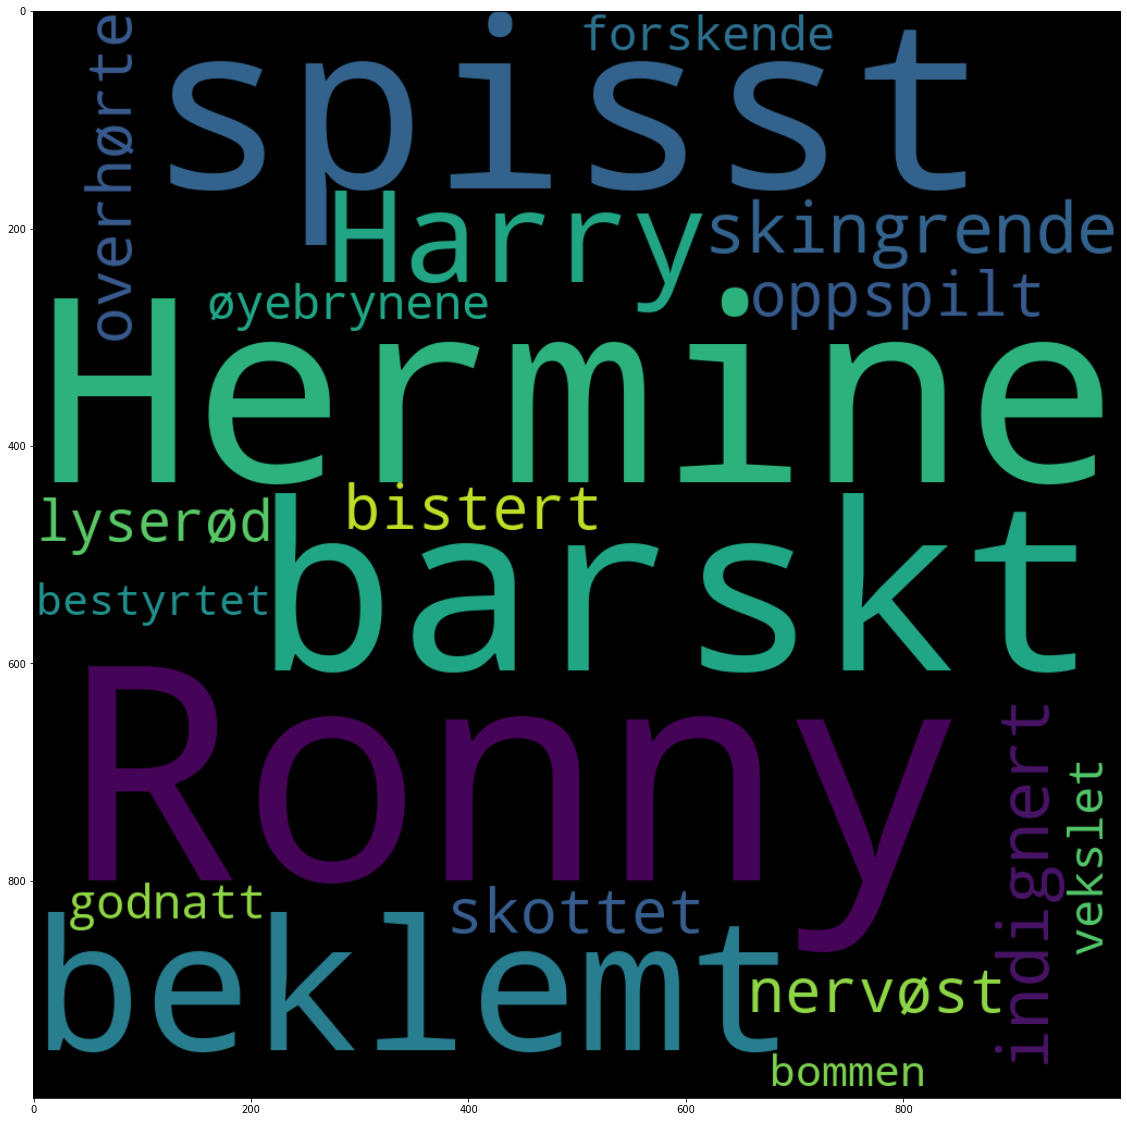

In [21]:
sky = nb.frame_sort(nb.frame(coll_matrix['Hermine']/tot['tot'])).head(20)
nb.cloud(sky)

In [22]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

In [23]:
select_form('rødt')

'subst'

In [24]:
nb.word_form('spiste')

['adj <perf-part> be ent <intrans1> <trans1> <trans11/opp> <trans11/på> <predik6> <refl9/innpå> <trans4> <part3/i> normert',
 'adj <perf-part> fl <intrans1> <trans1> <trans11/opp> <trans11/på> <predik6> <refl9/innpå> <trans4> <part3/i> normert',
 'verb pret <intrans1> <trans1> <trans11/opp> <trans11/på> <predik6> <refl9/innpå> <trans4> <part3/i> normert']

In [25]:
nb.word_lemma('spiste')

[['adj', 'spise'], ['verb', 'spise']]

In [26]:
character_words('Harry')

{'subst': ['kjensel', 'bykset', 'dagboka', 'ettertrykk', 'kappen'],
 'unknown': ['bråsnudde', 'halvkvalt', 'characters', 'bråstoppet'],
 'verb': ['glodde',
  'måpte',
  'overhørte',
  'glante',
  'pot',
  'bøy',
  'gapte',
  'myste',
  'kikket',
  'snurret',
  'flirte',
  'forbløffet',
  'skottet',
  'bløff',
  'overrumplet',
  'enset',
  'braste',
  'potter',
  'avskydde',
  'gjengjeldte',
  'hult'],
 'adj': ['indignert',
  'målløs',
  'bistert',
  'fortumlet',
  'desperat',
  'forlegent',
  'innbitt',
  'dystert',
  'barskt',
  'bittert',
  'nervøst',
  'mistenksomt',
  'ekkel']}

# Construct character vectors

Splits words into categories

In [53]:
cw = dict()
for w in characters:
    cw[w] = character_words(w,number_of_words=150)

In [81]:
json.dump(cw, open('harry_cvec.json', 'w'))

## Show all characters

Display the character vectors as types

In [54]:
text = ""
for ch in cw:
    #print(ch)
    innertext = ""
    for cat in cw[ch]:
        words = ', '.join([w for w in cw[ch][cat]])
        innertext += "\n## " + cat + "\n" + words
    #print(ch, words)
    text += "\n# "+ ch + "\n" + innertext
mu.printmd(text)


# Hermine

## adj
spisst, barskt, beklemt, skingrende, indignert, oppspilt, bistert, nervøst, lyserød, forskende, bestyrtet, åndsfraværende, overlegent, utålmodig, uanfektet, stillferdig, nølende, anklagende, sarkastisk, innbitt, tankefullt, knusende, advarende, sørgmodig, flinkeste, trivelige, storøyd, skarpt, nøkternt, sammenbitt, lynsnart, skeptisk, foraktelig, unnskyldende, misbilligende, bitende, desperat, henslengt, varsomt, makelig, vaktsomt, forlegent, vaklende, livredd, mismodig, innstendig, bustete, olmt, sjokkerende, engstelig, ergerlig, spydig, pinlige, undrende, bryskt, nedslått, skrekkslagen, unnagjort
## verb
overhørte, skottet, vekslet, smekket, sjokkert, himlet, klynket, overrumplet, glante, forskrekket, hæl, anspent, strålte, skummet, vettskremt, begravde, reparerte, nappet, dultet, krympet, mønstret, subbet, spådd, bekymret, tviholdt, snappet, spiddet, gispet, anspente, utestengt, bunter, oppbrakt, morsk, forbitret, hakk, overkjørt, fniste, blødde, irritert, marsjerte, luka, måpte, fomlet, forhekset, heiste, skulte, tørret, spratt, sneket, trev, forske, skvatt, mestret, dyttet, rynket, forutsett, ballet, øste, glodde
## subst
øyebrynene, bommen, tallerkenene, stavene, sinnsro, frokosten, overskriftene, trollmann, tribunen, skjerfet, puta, ettertrykk, fatning
## unknown
godnatt, bråstoppet, halvkvalt, oversa, avbrot, høvt
## interj
hæ
## adv
neimen
# Harry

## subst
kjensel, bykset, dagboka, ettertrykk, kappen, begeret, forbifarten, panikken, kofferten, adjø, defensiv, blaffen, kottet, opphisselsen, tauene, munnviken, døra
## unknown
bråsnudde, halvkvalt, characters, bråstoppet, overende, halweis, godnatt, ors
## verb
glodde, måpte, overhørte, glante, pot, bøy, gapte, myste, kikket, snurret, flirte, forbløffet, skottet, bløff, overrumplet, enset, braste, potter, avskydde, gjengjeldte, hult, forsynte, gliste, håndhilste, knuget, peste, gjespet, duppet, droppet, hvinte, skvatt, rygget, stappet, bommet, nølte, heiste, brydd, pilte, lirket, greide, hamret, famlet, hæl, lamslått, ignorerte, bannet, klemt, lurte, fort, rakk, irritert, blunket, langet, konsentrerte, halte, klasket, matt, limt, krabbet, glimt, klødde, gransket, gjenopptok, kula, frydet, dultet, geleidet, lempet, smatt, klatret, dytt, listet, bølge, kravlet, klikket, merket
## adj
indignert, målløs, bistert, fortumlet, desperat, forlegent, innbitt, dystert, barskt, bittert, nervøst, mistenksomt, ekkel, måpende, distré, nummen, beklemt, febrilsk, sammenbitte, hviskende, instinktivt, ergerlig, ettertrykkelig, lydløst, nedslått, lavt, innesperret, misunnelig, livredd, dovent, bestyrtet, buskete
## adv
baklengs
## prep
bakom, herover
# Ronny

## verb
glodde, måpte, himlet, skottet, skulte, dultet, gliste, vekslet, stappet, lusket, snappet, trev, snurret, gapte, flirte, snøftet, fniste, snorket, glante, overhørte, hikstet, veivet, forgiftet, halte, anspent, opphisset, øste, rynket, skubbet, skvatt, begravde, mumle, klasket, gjespet, falmet, ruslet, overrumplet, datt, myste, hveste, flerret, utbedre, duvet, hevnet, krympet, forsynte, besteg, subbet, bøy, spiddet, svime, smattet, tvinnet, bløff, rensket, jagde, smekket, hylte, spydde, forbitret, stirret, glis, braste, pekte, fomlet, trasket, glefset, fortet
## adj
storøyd, grettent, indignert, dystert, lengselsfullt, sarkastisk, lyserød, sammenbitte, nervøst, fortumlet, distré, åndsfraværende, advarende, innbitt, utydelig, bitende, mistenksomt, uforstående, likeglad, betydningsfullt, påkledd, bryskt, surt, misunnelig, utålmodig, søvnig, bittert, ekstatisk, anerkjennende, måpende, bestyrtet, panisk, umiskjennelig, tvilende, mistroisk, rødmende, ustøtt, besluttsomt, beklemt, lavt, blekere
## subst
bykset, vantro, tulling, baksida, timeplanen, munnfull, vemmelse, øyebrynene, ærefrykt, knokene, bitterheten, frokosten, månelyset, lørdagen, teten, brosjyren, grimaser
## unknown
bråstoppet, oversa, halvkvalt, medfølende, bråsnudde, bakfrå, ors, overende, køys, råds
# Malfang

## adj
slepende, hånlig, blekere, ondskapsfullt, sammenbitt, grettent, hardhendt, vemmelig, seilende, farende, spottende, sarkastisk, gretten, overdrevent, susende, ekkelt, merkverdig, motvillig, febrilsk, tenkelige, foraktelig, hviskende, pussig, håpløst, urørlig
## subst
fersken, dagboka, overarmen, vemmelse, arrest, besluttsomhet, grotesk, vanskelighet, staven, øyekroken, munnviken, spillerom, fjes, dragen, junior, hoff, fjeset, køen, frustrasjon, tynnere, madam, professoren, solskinnet, arving, motvilje, vantro, nesa, toalettet, ladning
## verb
måpte, snurret, sladret, forsømme, skygget, fniste, frikjent, åpna, forvridd, kruset, vedder, virka, brygger, smette, brøle, sjanglet, klorte, slentret, peste, svulmet, hamre, pakka, glapp, hæl, kretset, hylla, funderte, flirte, rygget, feirer, trynet, glattet, marsjerte, hoie, gjespet, påstått, snerret, snar, krympet, sprakk, vippet, bløtt, snike, stappet, ramlet, klappe, dryppet, fortjent, tilbragte, dritt, utvist, viftet, befinne, spark, greid, stivnet, kutte, røpe, gliste, brakk, sku, løpt, bøye, stav, slem, garantert, avslørte, nyter, hakk
## unknown
bråstoppet, ors, hvertfall, lallfall, overende, derre, hverandre.
## prep
herover, bortenfor
## interj
hæ
## adv
forhåpentlig, baklengs
## sbu
hvorpå
# Krabbe

## verb
tuslet, fniste, ravet, klukket, begravde, flirte, glefset, snurret, utstøtte, løsne, rygget, hakk, stjal, glodde, snublet, hylte, stivnet, smelte, akter, brølte, begeistret, spilte, pekte, dukket, levde, holder, trengte, sto, åpnet, lo, ropte, fulgte, holdt, satt, hørte, finner, kommet, sted, lå, visste, tatt, fikk, gjorde, komme, litt, så, helt, får, hadde, sa, skulle, kom, dem, opp, eller, var, ble, et, kan, seg, er, en, å, for
## adv
øyensynlig, tydeligvis, straks, akkurat, alltid, da, også, at
## adj
ulovlige, stygt, høyeste, mest
## det
halvannen, noe
## subst
kappen, sti, halsen, munnen, meter, gangen, slags, mens, under, ikke, i, om, med
## prep
framover, nede, utenfor, inne, ut, der, på, fra, til
## CLB
og
## pron
hva, denne, han, du, den, det
## sbu
som
## fork
av
# Slur

## unknown
oversa, gjøra, bråstoppet, sveige, overende, kke
## subst
staven, advarselen, innsida, forbannelser, fella, hælen, panikken, forvarsel, overlærer, tinningen, hilsener, forkjøpet, skylda, grimase, beger, overtaket, sårene, sinna, fornavn, pulsen, trangen, påskudd, glassene, flammene, styringen, vene, unnskyldning, skyggene, kappen, kjelen, antydning, hælene
## adj
ondskapsfullt, dovent, svevende, nifst, hånlig, ugjenkallelig, feiende, blekere, sammenbitte, ettertrykkelig, spottende, motstrebende, illevarslende, oppskaket, lavmælt, nedlatende, mistenksom, kaldt, glidende, granskende, farligste, farligere, iskaldt, skjærende, skjevt, oppmerksomt, andpusten, farende, opplagt, foraktelig, lavt, taust, nervøse, brå, smart
## verb
provosere, avskydde, ilegge, bløtt, frikjent, overdøvet, lusket, kolliderte, forhekset, ombestemme, mønstret, mislikte, tørret, enset, sjanglet, skreket, snappet, haltet, hamre, innblandet, feid, vaklet, kretset, svidd, blottet, plyndret, kruset, bjeffet, glatt, svevde, knuget, unnslippe, hveste, vippet, underviste, viftet, drepte, freste, smelte, mistenkt, pekte, anstrengt, unngått, sku, tidde, slengte, godtar, oppsatt, hater, trappa, marsjerte, feide, stjal, glodde, snek, overvinne, gjettet, skottet, forbløffet, avbrøt, datt
## adv
baklengs
## prep
bortenfor
# Humlesnurr

## adj
stillferdig, elskverdig, granskende, lavmælt, senil, vurderende, rungende, blidt, unnskyldende, høflig, forrest, bistert, ondskapsfullt, gladere, utvetydig, vennskapelig, uanfektet, forekommende, rolig, oppspilt, imøtekommende, liketil, utrettelig, muntert, klingende, vennlig, anerkjennende, skarpt, ørlite, skrøpelig, tankefullt, svevende, grundigere, bakerste, idiotisk, lavt, drømmende, bedende, flinkere, advarende
## verb
overhørte, forhekset, gjennomskuet, huket, kremtet, gjennomskue, nynnet, motarbeidet, spådd, bøy, advart, klin, sirklet, låser, vrøvl, suspendert, insistere, dirigerte, måpte, utstrålte, befalt, begraves, gjetter, sladre, glinset, enset, klukket, sjanglet, snappet, kvittet, peste, svulmet, langet, gransket, karet, overrumplet, myste, bommet, dukka, spekulerte, oppretter, kunngjorde, overse, hyle, oppfatta, splitter, nekta, forbød, stoler, greid, prima, strålte, helte, vrak, snurret, foraktet, bjeffet, svevde, snerret, fjæra, bann, avslått, røst, smilte
## unknown
vars, oversa, ors, morra, bråstoppet, øyeblikks, teneste
## subst
øyebrynene, tampen, tulling, trollmannen, trollmann, bøtta, sølvet, ministeren, ugler, rektor, dagboka, sve, madam, staven, assen, begeret, spion, skrinet, forferdelse, skjæret, trøbbel, handleddet, tausheten, roen, sinna
## adv
øyensynlig
# Gygrid

## verb
tørret, klasket, trev, brøle, peste, kamuflert, utvist, tute, hvelv, skulte, skjelle, gjespet, viftet, gravde, trampe, gryntet, fingret, ulte, hvinte, sjokkert, langet, strålte, bante, halte, røst, snufset, demonstrerte, overrumplet, resignert, glante, pakka, knakk, knuser, klappet, hyle, hikstet, bevæpnet, snøftet, beskyldt, glodde, rynket, flakket, skrapte, lamslått, utstøtte, begrave, stolt, børstet, frydet, krympet, foss, skummet, betrodd, stappet, gispet, svelget, vink, sprutet, tøff
## adj
barskt, hemmelighetsfullt, sørgmodig, indignert, egenhendig, ekstatisk, grettent, likeglad, lojalt, tillitsfullt, rungende, bønnfallende, urettmessig, makelig, dundrende, vaktsomt, kolossalt, patetisk, bistert, sløvt, ettertrykkelig, uanfektet, dunkelt, nervøst, åndsfraværende, pussig, blidt, tindrende, bekymrede, forbudte, fortumlet, oppskaket, lyserøde, entusiastisk, gigantisk, ergerlig, luftig, desperate, bedende, avvisende, gjennomsiktig
## unknown
halvkvalt, bråsnudde, overvaket, sorn, folkemengde
## subst
sparken, madame, tulling, baksida, selvtilliten, tommel, bykset, gjenkomst, paraplyen, korsryggen, ettertrykk, samtaleemne, bukett, assen, skriket, munnviken, munnvikene, høylytt, nesa, lommetørkleet, motstanderen, skjæret, delegasjon, kjølvannet, hodene, tanten
## interj
hæ
## adv
gudskjelov

In [57]:
merge_coll = pd.concat([nb.frame(coll_matrix[w]/tot['tot'], w) for w in coll_matrix], axis=1, sort=False)

In [58]:
merge_coll.head()

,Hermine,Harry,Ronny,Malfang,Krabbe,Slur,Humlesnurr,Gygrid
!,6.918621e-07,5.534897e-06,1.272134e-06,2.678176e-07,2.231813e-08,3.124539e-07,0.000001,9.596797e-07
"""",NaN,1.748135e-08,1.748135e-08,NaN,NaN,NaN,NaN,NaN
#,6.667835e-06,1.030484e-05,9.092502e-06,1.212334e-06,NaN,6.061668e-07,0.000001,1.212334e-06
$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.051541e-07
%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
nb.heatmap(nb.frame(merge_coll.loc["syk dårlig føler følte sa sier mente mener hevdet hevder løy ond ondskapsfullt".split()]))

,Hermine,Harry,Ronny,Malfang,Krabbe,Slur,Humlesnurr,Gygrid
syk,0,0,0,0,0,0,1.47332e-06,0
dårlig,0,1.55668e-06,0,5.18893e-07,0,0,0,0
føler,0,0,0,0,0,0,0,0
følte,2.41675e-06,2.53759e-05,1.20838e-06,0,0,4.02792e-07,8.05583e-07,0
sa,3.72129e-06,6.59684e-06,2.87555e-06,1.79299e-06,6.76599e-08,1.18405e-06,3.41682e-06,2.80789e-06
sier,2.68975e-07,1.34487e-07,2.68975e-07,2.68975e-07,0,2.68975e-07,1.88282e-06,5.37949e-07
mente,1.26047e-06,1.26047e-06,2.10078e-06,8.40313e-07,0,0,4.20157e-07,1.26047e-06
mener,2.69042e-07,2.69042e-07,2.69042e-07,0,0,2.69042e-07,5.38084e-07,0
hevdet,0,0,0,0,0,0,1.66495e-06,0
hevder,0,0,0,0,0,0,0,0


In [60]:
nb.heatmap(nb.frame_sort(merge_coll, 'Harry')[:20])

,Hermine,Harry,Ronny,Malfang,Krabbe,Slur,Humlesnurr,Gygrid
Ronny,0.000968485,0.0100183,0.000285782,4.76304e-05,0,1.58768e-05,7.9384e-05,7.9384e-05
Hermine,0.000295722,0.00699875,0.0201091,9.8574e-05,0,3.2858e-05,0,0.00016429
Potter,0,0.00615964,0,1.82779e-05,0,9.13893e-05,7.31114e-05,0
kjensel,0,0.000410669,0,0,0,0,0,0
bråsnudde,0,0.000358246,4.47808e-05,0,0,0,0,4.47808e-05
glodde,2.64117e-05,0.000334548,0.000272921,0,8.8039e-06,8.8039e-06,0,1.76078e-05
måpte,3.51025e-05,0.000315922,0.000175512,7.0205e-05,0,0,3.51025e-05,0
Harry,0.000168378,0.000233749,0.000287233,4.75421e-05,1.98092e-06,9.11223e-05,0.000120836,7.13131e-05
overhørte,0.000138709,0.000231182,6.93545e-05,0,0,0,9.24727e-05,0
glante,7.09975e-05,0.000212993,7.09975e-05,0,0,0,0,2.36658e-05


In [61]:
cosinus = nb.frame(matrix_cosine(merge_coll, top=300))

In [78]:
nb.heatmap(nb.frame_sort(cosinus, 'Humlesnurr'))

,Hermine,Harry,Ronny,Malfang,Krabbe,Slur,Humlesnurr,Gygrid
Humlesnurr,0.476294,0.90357,0.558785,0.887264,0.931361,0.987417,1,0.693103
Slur,0.403344,0.84688,0.487853,0.853108,0.969732,1,0.987417,0.591993
Krabbe,0.184462,0.70195,0.275773,0.711696,1,0.969732,0.931361,0.411909
Harry,0.782956,1,0.836421,0.977228,0.70195,0.84688,0.90357,0.889172
Malfang,0.814224,0.977228,0.864124,1,0.711696,0.853108,0.887264,0.828641
Gygrid,0.797311,0.889172,0.829133,0.828641,0.411909,0.591993,0.693103,1
Ronny,0.994381,0.836421,1,0.864124,0.275773,0.487853,0.558785,0.829133
Hermine,1,0.782956,0.994381,0.814224,0.184462,0.403344,0.476294,0.797311


In [77]:
nb.heatmap??

In [67]:
nb.heatmap(cosinus[cosinus.index])

,Gygrid,Harry,Hermine,Humlesnurr,Krabbe,Malfang,Ronny,Slur
Gygrid,1,0.889172,0.797311,0.693103,0.411909,0.828641,0.829133,0.591993
Harry,0.889172,1,0.782956,0.90357,0.70195,0.977228,0.836421,0.84688
Hermine,0.797311,0.782956,1,0.476294,0.184462,0.814224,0.994381,0.403344
Humlesnurr,0.693103,0.90357,0.476294,1,0.931361,0.887264,0.558785,0.987417
Krabbe,0.411909,0.70195,0.184462,0.931361,1,0.711696,0.275773,0.969732
Malfang,0.828641,0.977228,0.814224,0.887264,0.711696,1,0.864124,0.853108
Ronny,0.829133,0.836421,0.994381,0.558785,0.275773,0.864124,1,0.487853
Slur,0.591993,0.84688,0.403344,0.987417,0.969732,0.853108,0.487853,1


In [76]:
cosinus[cosinus.index].style.bar( align='mid', color=['#2A9'])

,Gygrid,Harry,Hermine,Humlesnurr,Krabbe,Malfang,Ronny,Slur
Gygrid,1,0.889172,0.797311,0.693103,0.411909,0.828641,0.829133,0.591993
Harry,0.889172,1,0.782956,0.90357,0.70195,0.977228,0.836421,0.84688
Hermine,0.797311,0.782956,1,0.476294,0.184462,0.814224,0.994381,0.403344
Humlesnurr,0.693103,0.90357,0.476294,1,0.931361,0.887264,0.558785,0.987417
Krabbe,0.411909,0.70195,0.184462,0.931361,1,0.711696,0.275773,0.969732
Malfang,0.828641,0.977228,0.814224,0.887264,0.711696,1,0.864124,0.853108
Ronny,0.829133,0.836421,0.994381,0.558785,0.275773,0.864124,1,0.487853
Slur,0.591993,0.84688,0.403344,0.987417,0.969732,0.853108,0.487853,1


In [41]:
import networkx as nx

In [42]:
import dhlab.graph_networkx_louvain as gnl

In [43]:
G = nx.from_pandas_adjacency(cosinus)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


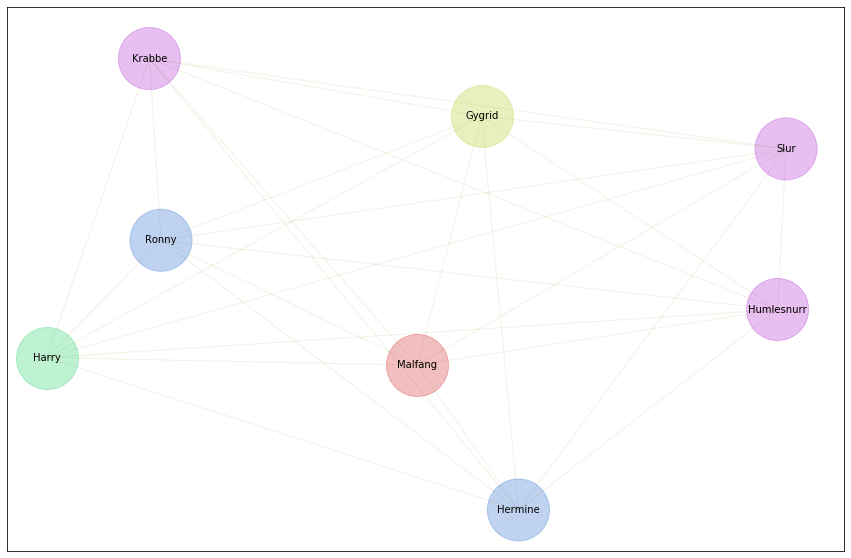

In [44]:
gnl.show_graph(G)

In [45]:
gnl.show_communities(G)

Gygrid :  Gygrid

Harry :  Harry

Ronny-Hermine :  Ronny, Hermine

Humlesnurr-Krabbe :  Humlesnurr, Krabbe, Slur

Malfang :  Malfang



In [46]:
nb.urn_concordance(word = "fortumlet", urns = whole_series, size=20)

"Harry Potter og de vises stein, Rowling, J.K., 2011","Men Nilus - nervøs ,",fortumlet,og redd for å bli
"Harry Potter og de vises stein, Rowling, J.K., 2011",Kvist ? tenkte Harry,fortumlet,. Var det en stokk
"Harry Potter og de vises stein, Rowling, J.K., 2011",slapp han kvelertaket og stirret,fortumlet,på handflatene - Harry kunne
"Harry Potter og fangen fra Azkaban, Rowling, J.K., 2011",med deg ! » Totalt,fortumlet,stirret Harry på bålet .
"Harry Potter og fangen fra Azkaban, Rowling, J.K., 2011",", og stemmen lød like",fortumlet,som imponert .
"Harry Potter og fangen fra Azkaban, Rowling, J.K., 2011",. Harry hadde bare et,fortumlet,inntrykk av larm og kropper
"Harry Potter og fangen fra Azkaban, Rowling, J.K., 2011",av ham . Harry prøvde,fortumlet,å reise seg ; det
"Harry Potter og fangen fra Azkaban, Rowling, J.K., 2011",Hermine . Ronny så like,fortumlet,ut som ham seiv og
"Harry Potter og fangen fra Azkaban, Rowling, J.K., 2011",venn ... han var helt,fortumlet,... Hva kom til å
"Harry Potter og fangen fra Azkaban, Rowling, J.K., 2011",åpne hoveddørene . Han så,fortumlet,"på Hermine , og på"
"Harry Potter og ildbegeret, Rowling, J.K., 2011",like,fortumlet,som irene over den brå
